# Objective

- To demonstrate how to build a movie recommendation system using two different approaches: demographic filtering and content-based filtering.

- Demographic Filtering:

    Calculate a weighted score for each movie based on its average rating and number of votes.
    Rank the movies based on popularity using demographic filtering.
<p></p>
- Content-Based Filtering:

    Use the overview text of movies to compute TF-IDF vectors.
    Calculate cosine similarity between movie overviews to find similar movies.
    Generate recommendations based on content similarity using content-based filtering.
    Extract and preprocess additional features such as cast, crew, keywords, and genres for content-based filtering.
    Create a combined feature vector (soup) from these features to compute cosine similarity.
    Implement a content-based recommendation system using metadata features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load the credits dataset
credits_df = pd.read_csv('tmdb_5000_credits.csv')
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
# Load the movies dataset
movies_df = pd.read_csv('tmdb_5000_movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# Display the shape and information of the credits dataset
credits_df.shape
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
# Print descriptive statistics for the movies dataset
print("Descriptive Analytics for TMDB 5000 Movie Dataset")
print()
print(movies_df.describe())

Descriptive Analytics for TMDB 5000 Movie Dataset

             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000

In [6]:
# Extract relevant columns from movies dataset
movies_df[['original_title','genres']]

,original_title,genres
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...
4798,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4800,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4801,Shanghai Calling,[]


In [7]:
# Merge both datasets based on 'id' column
credits_df.columns = ['id','title','cast','crew']
movies_df = movies_df.merge(credits_df, on='id')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
# Demographic Filtering
C = movies_df["vote_average"].mean()
m = movies_df["vote_count"].quantile(0.9)
print("C: ", C)
print("m: ", m)
new_movies_df = movies_df.copy().loc[movies_df["vote_count"] >= m]
print(new_movies_df.shape)

C:  6.092171559442016
m:  1838.4000000000015
(481, 23)


In [9]:
# Calculate weighted rating for each movie
def weighted_rating(x, C=C, m=m):
    v = x["vote_count"]
    R = x["vote_average"]
    return (v/(v + m) * R) + (m/(v + m) * C)

In [10]:
# Apply weighted rating function to calculate scores
new_movies_df["score"] = new_movies_df.apply(weighted_rating, axis=1)
new_movies_df = new_movies_df.sort_values('score', ascending=False)
new_movies_df[['original_title',"vote_count", "vote_average", "score"]].head(10)


,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


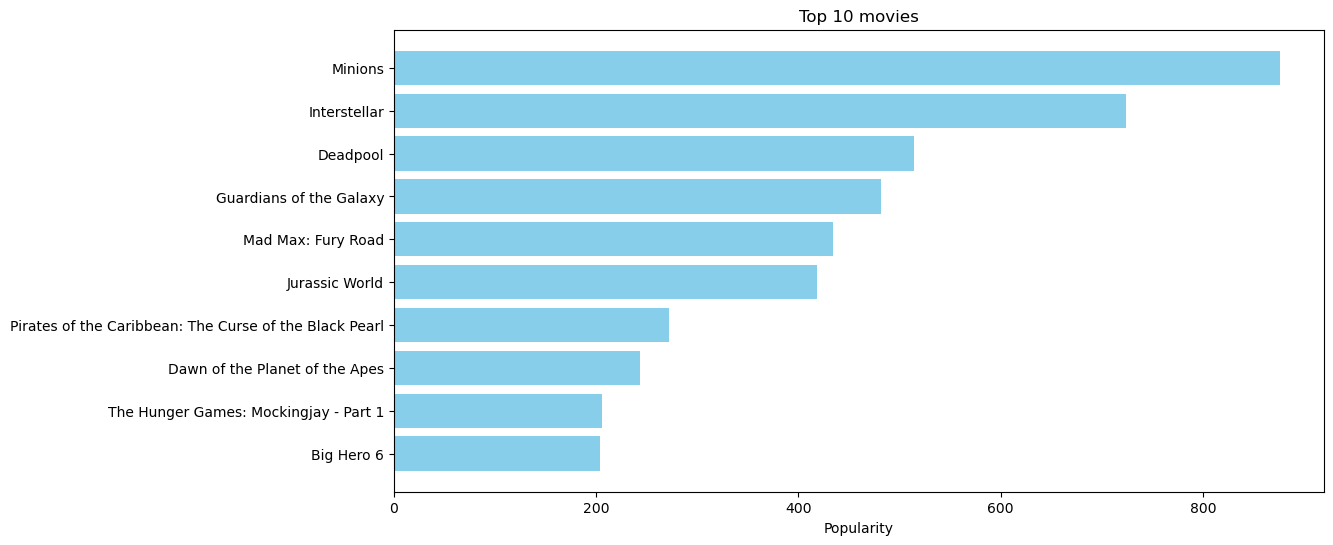

In [11]:
# Plot top movies by popularity
def plot():
    popularity = movies_df.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["original_title"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()

plot()

In [12]:
# Content-based Filtering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [13]:
# Process overview text data
print(movies_df["overview"].head(5))
tfidf = TfidfVectorizer(stop_words="english")
movies_df["overview"] = movies_df["overview"].fillna("")
tfidf_matrix = tfidf.fit_transform(movies_df["overview"])
print(tfidf_matrix.shape)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object
(4803, 20978)


In [14]:
# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
indices = pd.Series(movies_df.index, index=movies_df["original_title"]).drop_duplicates()

# Get recommendations based on similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movies_indices = [ind[0] for ind in sim_scores]
    movies = movies_df["original_title"].iloc[movies_indices]
    return movies

print("# Content Based Filtering - plot#")
print()
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises"))
print()
print("Recommendations for Avengers")
print(get_recommendations("The Avengers"))


(4803, 4803)
# Content Based Filtering - plot#

Recommendations for The Dark Knight Rises
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

Recommendations for Avengers
7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286

In [15]:
# Process categorical features
features = ["cast", "crew", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

# Extract director information
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

movies_df["director"] = movies_df["crew"].apply(get_director)

# Extract top 3 values for each feature
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

# Clean data by lowercasing and removing spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ""

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

# Create combined soup of features
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


In [16]:
# Create count matrix for features
count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])
print(count_matrix.shape)


(4803, 11520)


In [17]:
# Compute cosine similarity for feature matrix
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim2.shape)

(4803, 4803)


In [18]:
# Reset index for movies dataframe
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['original_title'])


In [19]:
print("# Content Based System - metadata #")
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises", cosine_sim2))
print()
print("Recommendations for Avengers")
print(get_recommendations("The Avengers", cosine_sim2))

# Content Based System - metadata #
Recommendations for The Dark Knight Rises
65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: original_title, dtype: object

Recommendations for Avengers
7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: original_title, dtype: object


In [20]:
# User input for movie title
user_input = input("Enter the movie title you want recommendations for: ")

# Check if the movie title exists in the dataset
if user_input in movies_df['original_title'].values:
    recommendations = get_recommendations(user_input)
    print("Recommended movies:")
    print(recommendations)
else:
    print("Movie not found in dataset.")

Enter the movie title you want recommendations for: American Psycho
Recommended movies:
1002                    The One
3409        Criminal Activities
1592                 Black Rain
4774             Pink Narcissus
4142            $upercapitalist
298     The Wolf of Wall Street
4057     The Valley of Decision
4081      Das Leben der Anderen
4417    My Last Day Without You
3862                Margin Call
Name: original_title, dtype: object


# 

- the code demonstrates how to leverage movie metadata and user ratings to recommend movies to users. 
- Demographic filtering provides recommendations based on overall popularity and ratings, while content-based filtering suggests movies based on similarity in content features such as cast, crew, and genres. 
- The combination of these approaches can lead to more personalized and relevant movie recommendations for users.